# **Introducción a Python**
# FP10. Trabajando con archivos de texto simples

¡Hola espías!

En esta oportunidad vamos a trabajar con archivos. Al final de esta lección, podrá abrir archivos y trabajar con ellos usando código.

Python puede manejar fácilmente el trabajo con archivos .txt (más adelante aprenderás a trabajar con otros formatos de archivo, como .csv). Repasemos las mejores prácticas para trabajar con archivos de texto simples en Python.

## <font color='blue'>__Abrir un archivo__</font>

Para usar un archivo y hacer algo con él, lo primero que debemos hacer es abrirlo. Sí, igual que como hacemos con un libro.<br>
Usaremos la función `open( )`, de la siguiente forma:

``` python
my_file = open ('ruta_del_archivo/nombre_archivo.extensión')
```

* **ruta_del_archivo**, corresponde a la ruta (path) en el cual se encuentra el archivo; considera que puede hacer diferencias en el uso de los slash (/) o backslash (\) dependiendo de si tu sistema operativo es MacOS, Linux o Windows.
* **file_name.extension**, el nombre que elegimos del archivo y su respectiva extensión.

In [ ]:
# Por ejemplo si escribimos mal el nombre o el archivo no existe en el directorio actual,
# esta celda dará un error
my_file = open('nombre_inexistente.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'nombre_inexistente.txt'

Esto significa que ocurrieron dos cosas posibles, o el nombre del archivo es incorrecto o no se proporcionó la ruta del archivo correcta. Cuando trabajas en Colab la ruta hay que armarla desde tu Drive de Google en la nube.

### <font color='red'>Importante</font>

Si estás trabajando en Colab, estás trabajando en la nube; por ello, antes de iniciar el trabajo con archivos, debes montar el Drive (de Google) en el cual estás trabajando.<br>
Para hacer eso usaremos el siguiente snippet de cógigo:

``` python
from google.colab import drive
drive.mount('/content/drive')
```

El montar el Drive te permitirá en el futuro acceder a datos almacenados en la nube.

Veamos como hacer esto en el siguiente video.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### [Cómo montar mi Drive en Colab](https://youtu.be/hZFQ9tjXmVw)

In [ ]:
myfile = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt')

Cuando abrimos un archivo, creamos un nuevo objeto al cual le asignamos un puntero. En este caso, el objeto se llama *myfile* <br>
El puntero nos dirá en que parte del archivo estamos posicionados y al abrir el archivo quedará posicionado por defecto al inicio.<br>
Veamos el tipo de objeto:

In [ ]:
type(myfile)

_io.TextIOWrapper


__TextIOWrapper__ es una clase en Python que actúa como un "envoltorio" o "wrapper" alrededor de un objeto de tipo archivo (file). Proporciona una interfaz de alto nivel para trabajar con archivos de texto, permitiendo leer y escribir texto en diferentes codificaciones.

## <font color='blue'>__Métodos asociados a nuestro nuevo objeto__</font>
Ahora podemos llamar a varios métodos de lectura de este archivo de texto:

### El método `read()`
`read()` devuelve todo el contenido como una cadena:

In [ ]:
myfile.read()

'Primera linea\nSegunda linea\nTercera linea\nCuarta linea\n'

Si ejecutas la sentencia anterior nuevamente, obtendrás un string vacío (''):

In [ ]:
myfile.read()

''

Eso es porque el "cursor" está al final del archivo. Puedes restablecer el cursor al inicio usando el método `seek()`:

In [ ]:
myfile.seek(0)

0

In [ ]:
myfile.read()

'Primera linea\nSegunda linea\nTercera linea\nCuarta linea\n'

### <font color='green'>Actividad 1:</font>
Qué pasa si usas `seek()` con el cursor en diferentes posiciones?<br>
Pon el cursor en las siguientes posiciones 10, 45 y 88.<br>
Analiza el resultado de cada una de ellas.
* Todas devolvieron resultados?
* Si alguna no lo hizo, por qué ocurrió eso?
* `seek()` cuenta los caracteres de escape incluidos (\n)?

Tip:
1. Usa el método `seek(numero_posicion)`
2. Luego verifica con `myfile.read()`

In [ ]:

with open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt', 'r') as myfile:
    # Movemos el cursor a la posición 10
    myfile.seek(10)
    print("Posición 10:")
    print(myfile.read())  # Leemos desde la posición 10 hasta el final

    # Movemos el cursor a la posición 45
    myfile.seek(45)
    print("\nPosición 45:")
    print(myfile.read())  # Leemos desde la posición 45 hasta el final

    # Movemos el cursor a la posición 88
    myfile.seek(88)
    print("\nPosición 88:")
    print(myfile.read())  # Leemos desde la posición 88 hasta el final


Posición 10:
nea
Segunda linea
Tercera linea
Cuarta linea


Posición 45:
rta linea


Posición 88:



Posición 10:

Si el archivo tiene al menos 10 caracteres, el cursor se moverá a esa posición y read() leerá el contenido desde allí hasta el final del archivo. Si la posición 10 está dentro de una palabra o línea, empezará a leer desde ese punto.

Posición 45:

De manera similar, si el archivo tiene al menos 45 caracteres, se leerá desde la posición 45 en adelante. Si no hay suficientes caracteres, seek() podría ir más allá del final del archivo, y read() devolvería una cadena vacía.

Posición 88:

Si el archivo tiene menos de 88 caracteres, el cursor se moverá más allá del final del archivo, pero como no hay nada más que leer, el método read() devolverá una cadena vacía.

¿Todas las posiciones devolvieron resultados?
Si el archivo es suficientemente grande, las posiciones 10, 45 y 88 devolverán resultados. Si alguna de las posiciones está más allá del tamaño del archivo, read() devolverá una cadena vacía.

Si alguna no lo hizo, ¿por qué ocurrió eso?
Si no se obtiene resultado en alguna posición, es porque el cursor se movió más allá del final del archivo, y no hay contenido para leer.

¿seek() cuenta los caracteres de escape incluidos (\n)?
Sí, seek() cuenta todos los caracteres en el archivo, incluidos los caracteres de escape como \n. Cada salto de línea se considera un carácter único.

<font color='green'>Fin actividad 1</font>

### El método `readlines()`

Debido a que muchos archivos tienen **saltos de línea (\ n)**, a menudo la gente quiere usarlos como separadores y leer todo el archivo de texto como una lista, donde cada elemento de la lista es una cadena que representa una línea en el archivo de texto .

In [ ]:
myfile = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt')

In [ ]:
myfile.seek(0)

0

In [ ]:
myfile.readlines()

['Primera linea\n', 'Segunda linea\n', 'Tercera linea\n', 'Cuarta linea\n']

### <font color='green'>Actividad 2:</font>
¿Qué tipo de objeto devuelve el método `readlines()`?
Determina el tipo de objeto que devuelve el método `readline()`

Tip:
1. Utiliza la función `type()` sobre `myfile.readlines()`

In [ ]:
# Tu código aquí ...

with open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt', 'r') as myfile:
# Ver el tipo de objeto devuelto por readlines()
    lineas = myfile.readlines()
    print(type(lineas))  # Esto imprimirá <class 'list'>

    # Ver el tipo de objeto devuelto por readline()
    myfile.seek(0)  # Volvemos al inicio del archivo
    una_linea = myfile.readline()
    print(type(una_linea))


<class 'list'>
<class 'str'>


<font color='green'>Fin actividad 2</font>

## <font color='blue'>**Ubicaciones de archivos cuando trabajas en modo local**</font>

Si estás trabajando con una versión de Python instalada en tu computador, puedes acceder a los archivos ubicados en tu disco duro. Si el archivo a abrir está en la misma carpeta del notebook, utiliza la siguiente instrucción:
``` Python
      my_file = open ('nombre_archivo.extensión')  # No se incluye la ruta de acceso
```

Por el contrario, si deseas abrir archivos en otra ubicación de su computadora, simplemente ingresa la ruta completa o absoluta del archivo.

Para Windows, debe usar doble \\ (backslash) para que Python no trate el segundo \ como un carácter de escape, una ruta de archivo tiene la forma:
```Python
     myfile = open ("C:\\Users\\YourUserName\\Home\\Folder\\myfile.txt")
```    
Para MacOS y Linux, usa barras en la dirección opuesta (slash):
```python
     myfile = open ("/Usuarios/NombreDeUsuario/Carpeta/myfile.txt")
```    
Este fue un ejemplo, intenta abrir y leer el archivo usando *tu propia ruta*

### <font color='green'>Actividad 3:</font>
### <font color='red'>Atención: realiza esta activiidad sólo si estás trabajando en modo local</font>
Abre el archivo text_file.txt usando tu propia ruta absoluta

Tip:
1. Busca tu ruta usando el Explorador de Windows o el Finder del Mac.
2. Abre el archivo de esta manera:
``` python
      myfile = open ("C:\\tu_ruta_va_aqui\\myfile.txt")
```
3. Recuerda separar las carpetas en su ruta con barras invertidas dobles ( \\\ ) en Windows o una barra simple ( / ) en Mac y Linux.

In [ ]:
# Tu código aquí ...
# Ruta absoluta de direccion local (MacOS) usando JupyterLab a través de Anacona Navigator
myfile = open ("/Users/yantra/Library/CloudStorage/GoogleDrive-imixqanil@gmail.com/Mi unidad/DATA SCIENCE UDD 2024/MODULO 1/archivo_1.txt")
myfile.close()
## En este caso NO estamos trabajando en modo local, si se ejecuta el codigo daría error

<font color='green'>Fin actividad 3</font>

## <font color='blue'>**No te olvides de cerrar la puerta al salir**</font>

Como con el libro, cuando terminas de usarlo (leerlo) ... lo cierras.

En Python *siempre* cerramos los archivos que abrimos. Para hacer eso usamos el método `close()` de esta manera:

```python
    myfile.close()
```

## <font color='green'>Actividad 4:</font>
### Cierra el archivo

Tip:
1. Cierra el archivo abierto de esta forma:
```python
    myfile.close()
```

In [ ]:
# Tu código aquí ...
myfile = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt')
lines = myfile.read()
print(lines)
myfile.close()


Primera linea
Segunda linea
Tercera linea
Cuarta linea



<font color='green'>Fin actividad 4</font>

## Veamos un ejemplo completo

La secuencia completa sería la siguiente. Ajusta la ruta de acceso en la siguiente celda y ejecútala.

In [ ]:
# Completa el código con la ruta de acceso correcta
myfile = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt')
lines = myfile.read()
print(lines)
myfile.close()

Primera linea
Segunda linea
Tercera linea
Cuarta linea



## <font color='blue'>**Best Practice ... la forma Pythonista !!**</font>
Es una buena práctica usar la declaración `with ...` para abrir archivos, esto te permite no preocuparte por tener que cerrar el archivo después de abrirlo. Aquí está la sintaxis:

<font color='red'>Atención: Recuerda corregir la ruta</font>

In [ ]:
with open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt') as myfile:
    # Fíjate en la indentación!
    # Veremos este tema de la indentación en profundidad más adelante
    lines = myfile.read()
    print(lines)
    myfile.close()

# El archivo se cierra automáticamente después de la cláusula with ...
# el contenido quedo guardado en el string 'lines'

In [ ]:
type(lines)

str

In [ ]:
print(lines)

Primera linea
Segunda linea
Tercera linea
Cuarta linea



## <font color='blue'>**Opciones de lectura y escritura**</font>
La función `open()` tiene un segundo parámetro que le permite especificar si sólo desea poder leer el archivo, escribir en él o hacer ambas cosas.<br>
A continuación, se muestra una tabla con algunas de las opciones más importantes:

| Modos | Descripción |
|:----------------:|:--------|
|  r            | Abre un archivo solo para lectura.<br>El puntero de archivo se coloca al principio del archivo. Este es el modo por defecto |
| r+            | Abre un archivo para leer y escribir.<br>El puntero de archivo colocado al principio del archivo. |
|  w            | Abre un archivo solo para escritura. <br>Sobrescribe el archivo si existe. Si el archivo no existe, crea un nuevo archivo para escribir. |
|  w+          | Abre un archivo para escribir y leer.<br>Sobrescribe el archivo existente si el archivo existe. Si el archivo no existe, crea un nuevo archivo para leer y escribir. |
|  a      | Abre un archivo para agregar. <br>El puntero de archivo está al final del archivo si el archivo existe, es decir, el archivo está en modo adjuntar. <br>Si el archivo no existe, crea un nuevo archivo para escribir. |
|  ab       | Abre un archivo para agregar en formato binario.<br> El puntero de archivo está al final del archivo si el archivo existe, es decir, el archivo está en modo adjuntar. <br>Si el archivo no existe, crea un nuevo archivo para escribir |
|  a+          | Abre un archivo para agregarlo y leerlo. <br>El puntero de archivo está al final del archivo si el archivo existe. <br>El archivo se abre en el modo anexar. <br>Si el archivo no existe, crea un nuevo archivo para lectura y escritura. |




Siempre se muy consciente del directorio en el cual estás trabajando. Las siguientes líneas de código te dirán dónde estás actualmente.<br>
Por ahora no te preocupes sobre qué es `import os`; eso ya lo veremos más adelante.

In [ ]:
import os
os.getcwd() # get current working directory


'/content'

In [ ]:
# Probablemente second_file.txt no está en dicho directorio,
# así es que recuerda corregir la ruta
f = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_2.txt')
f.read()

'Solo una linea'

## <font color='blue'>**Escribiendo archivos**</font>
### Intentemos escribir en el archivo

In [ ]:
# Este código te dará error ....

f = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt')
f.write("new line")

UnsupportedOperation: not writable

In [ ]:
#inicio experimento

#fin de experimento

Por defecto, la función `open()` abre los archivos en modo lectura solamente. Luego, necesitamos decirle que queremos escribir en el archivo. <br>

Tal como vimos más arriba, utilizaremos el modo `w` para escribir en un archivo; sin ambargo, como éste no existe, primero lo creará y luego escribirá sobre él.

In [ ]:
f = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_3.txt','w')

# La función 'write' además de escribir, retorna el número de caracteres escritos
f.write('Creamos un nuevo archivo con una línea\n')

39

In [ ]:
f.close()

In [ ]:
f = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_3.txt')
f.read()

'Creamos un nuevo archivo con una línea\n'

In [ ]:
# Escribamos algo adicional
# Abriremos el archivo en modo escritura y lectura (w+)
f = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_1.txt','w+')
# y escribimos en él
f.write('Esta es una línea adicional\n')

# Veamos que hay en el archivo hasta ahora
f.seek(0)
f.read()

'Esta es una línea adicional\n'

Observa cómo se ha sobrescrito el contenido previo (*'Creamos un nuevo archivo con una linea\n'*) !!<br>
Si deseas agregar al archivo, debes usar el modo **`a+`** para escribir en él y luego poder leerlo.

In [ ]:
f = open(
    '/content/drive/MyDrive/Gonzalo/Clase 3/archivo_3.txt',
    'a+'
    )
f.write("Esta es una segunda línea adicional\n")
f.seek(0)
print(f.read())
f.close()

Creamos un nuevo archivo con una línea
Esta es una segunda línea adicional



### <font color='green'>Actividad 5:</font>
Añade dos nuevas líneas al archivo *archivo_3.txt* recién creado.<br>
Verifica los contenidos.

Tip:
1. Necesitas abrir el archivo en modo `a+`
```python
     file_to_add = open('.../archivo_3.txt','a+')
```
2. Escribe dos líneas
```python
     file_to_add.write('New line')
```
3. Lee el archivo usando `read()`
4. Cierra el archivo usando `close()`

In [ ]:
# Tu código aquí ...
file_to_add = open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_3.txt', 'a+')

# Escribe dos nuevas líneas al archivo
file_to_add.write('New line 1\n')
file_to_add.write('New line 2\n')

# Mueve el cursor al principio del archivo para leer su contenido
file_to_add.seek(0)

# Lee el contenido del archivo y lo imprime
content = file_to_add.read()
print("Contenido del archivo después de añadir las nuevas líneas:")
print(content)

# Cierra el archivo
file_to_add.close()


Contenido del archivo después de añadir las nuevas líneas:
Creamos un nuevo archivo con una línea
Esta es una segunda línea adicional
New line 1
New line 2



<font color='green'>Fin actividad 5</font>

### <font color='green'>Actividad 6:</font>
Haz lo mismo anterior pero utilizando la sentencia `with`. <br>
Verifica los contenidos.

Esta es la forma *pythonista* de abrir archivos!!

Tip:
1. Necesitarás usar la sentencia `with open ... `
```python
    with open('.../archivo_3.txt') as archivo:
```
2. Añade la siguiente línea
```python
    archivo.write('Esta vez abrimos el archivo como verdadero pythonista y agregamos una línea\n')
```
3. Lee el archivo utilizando `read()`

In [ ]:
# Tu código aquí ...
with open('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_3.txt', 'a+') as archivo:
    # Añadir una nueva línea al archivo
    archivo.write('Esta vez abrimos el archivo como verdadero pythonista y agregamos una línea\n')

    # Mover el cursor al inicio del archivo para leer su contenido
    archivo.seek(0)

    # Leer el contenido del archivo
    contenido = archivo.read()

# Imprimir el contenido del archivo después de las modificaciones
print("Contenido del archivo después de añadir la nueva línea:")
print(contenido)


Contenido del archivo después de añadir la nueva línea:
Creamos un nuevo archivo con una línea
Esta es una segunda línea adicional
New line 1
New line 2
Esta vez abrimos el archivo como verdadero pythonista y agregamos una línea



<font color='green'>Fin actividad 6</font>

## <font color='blue'>__Borrando archivos__</font>
También podemos borrar los archivos que generamos. Para ello utilizamos la función `remove()`. No te preocupes por ahora de las instrucciónes `from ... import ...`; las veremos más adelante.

In [ ]:
from os import remove
from os import path
# Verificamos que la ruta y el archivo existan
if path.exists('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_4.txt'):

    remove('/content/drive/MyDrive/Gonzalo/Clase 3/archivo_4.txt')

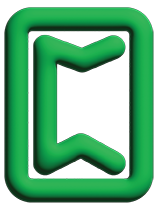
<br clear="left">

## <font color='blue'>**Resumen**</font>

A continuación un resumen del trabájo básico con achivos en Python. La función `open()` devuelve un objeto de tipo file. Este objeto se utiliza para interactuar con archivos en el sistema de archivos de la computadora.

El objeto file proporciona métodos y atributos que permiten leer, escribir y manipular archivos. Al abrir un archivo con `open()`, se puede especificar el modo en el que se desea interactuar con el archivo, como lectura (`'r'`), escritura (`'w'`), anexado (`'a'`), entre otros.

Algunas utilidades del objeto file incluyen:

* Leer contenido de archivos: Se puede utilizar el método `read()` para leer el contenido completo de un archivo o el método `readline()` para leer línea por línea.
* Escribir en archivos: Se puede utilizar el método `write()` para escribir contenido en un archivo.
Cerrar archivos: Es importante cerrar los archivos después de utilizarlos para liberar los recursos del sistema. Esto se puede hacer llamando al método `close()` del objeto file.
* Además, el objeto file también se puede utilizar en un contexto de administración (`with ...`
) para garantizar que el archivo se cierre correctamente incluso si ocurren excepciones durante su procesamiento.

Buen trabajo espías!!